<a href="https://colab.research.google.com/github/Philipof/PredictiveAnalytics/blob/master/Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor




# **Census Data**

In [ ]:
df2 = pd.read_csv('ED-Data.csv', encoding = 'unicode_escape')

<ipython-input-2-3a356d0ad9a7>:1: DtypeWarning: Columns (23,24,25,26,27,28,58,59,60,61,62,63,93,94,97,98,99,100,101,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,181,182,185,192,193,201,204,208,209,210,217,220,222,223,225,226,230,231,236,241,242,243,244,245,249,250,251,256,262,263,265,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,315,328,332,335,337,341,342,343,353,354,355,358,364,373,374,375,378,380,381,382,383,391,394,405,409,410,412,413,414,418,425,429,430,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,522,523,526,527,528,529,538,541,548,556,557,558,559,564,565,566,567,569,573,575,585,589,597,598,599,601,602,608,609,610,614,615,621,622,623,626,627,628,633,634,636,637,638,639,640,641,643,645,647,648,657,659,671,672,679,681,682,683,684,687,688,689,693,694,695,697,699,700,704,712,722,727,728,730,733,734,735,738,740,742,743,746,748,750,751,752,753,754,755,756,757,760,761,762,763,

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Columns: 803 entries, GUID to Median Household Gross Income
dtypes: int64(337), object(466)
memory usage: 20.9+ MB


In [ ]:
for col in df2.columns[3:]:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Columns: 803 entries, GUID to Median Household Gross Income
dtypes: float64(463), int64(337), object(3)
memory usage: 20.9+ MB


In [ ]:
for col in df2.columns:
    if df2[col].dtype == 'float64':
        df2[col].fillna(df2[col].mean(), inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Columns: 803 entries, GUID to Median Household Gross Income
dtypes: float64(463), int64(337), object(3)
memory usage: 20.9+ MB


In [ ]:
df2.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T,Median Household Gross Income
0,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban,21,27,16,24,35,25,30,...,210.547218,700.0,140,263.927002,199.171704,125,500.0,125,263.927002,28511
1,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban,6,5,9,9,7,10,7,...,314.000000,230.0,65,609.000000,355.000000,26,160.0,68,609.000000,28645
2,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore,2,1,2,3,2,2,4,...,111.000000,67.0,6,184.000000,78.000000,35,66.0,5,184.000000,52789
3,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown,9,15,8,4,15,6,10,...,225.000000,162.0,8,395.000000,199.000000,65,124.0,7,395.000000,35810
4,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown,2,1,2,2,3,2,0,...,61.000000,37.0,2,100.000000,53.000000,14,31.0,2,100.000000,42365


# Regression

In [ ]:
df2 = df2[df2.columns.drop(['GUID', 'GEOGID',	'GEOGDESC'])]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Median Household Gross Income', axis=1), 
                                                    df2['Median Household Gross Income'], 
                                                    test_size=0.2, random_state=42)

# Fit the linear regression model on the training set
reg = LinearRegression().fit(X_train, y_train)

# Get the coefficients of the model and sort them in descending order
coef = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': reg.coef_})
top10_coef = coef.iloc[(-np.abs(coef['Coefficient'].values)).argsort()[:10]]

# Select the top 10 features
selected_features = top10_coef['Variable'].values

# Train the model
reg_selected = LinearRegression().fit(X_train[selected_features], y_train)

# Evaluate the performance 
y_pred = reg_selected.predict(X_test[selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MSE: ", mse)
print("R-squared: ", r2)


MSE:  103232107.51672994
R-squared:  0.2635507078065874


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Median Household Gross Income', axis=1), 
                                                    df2['Median Household Gross Income'], 
                                                    test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the random forest regression model on the training set
reg = RandomForestRegressor(n_estimators = 30, random_state = 42).fit(X_train_scaled, y_train)

# Get the feature importances of the model and sort them in descending order
importances = pd.DataFrame({'Variable': X_train.columns, 'Importance': reg.feature_importances_})
top10_importances = importances.iloc[(-np.abs(importances['Importance'].values)).argsort()[:10]]

# Select the top 10 features
selected_features = top10_importances['Variable'].values

# Train the model
reg_selected = RandomForestRegressor().fit(X_train_scaled[:, np.where(X_train.columns.isin(selected_features))[0]], y_train)

# Evaluate the performance 
y_pred = reg_selected.predict(X_test_scaled[:, np.where(X_test.columns.isin(selected_features))[0]])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MSE: ", mse)
print("R-squared: ", r2)



MSE:  30790238.025745604
R-squared:  0.7803449958933345


In [ ]:
print(selected_features)

['T6_3_RLAH' 'T6_8_UHH' 'T6_4_GE8RP' 'T9_1_PWF' 'T6_4_GE8RH' 'T15_1_NC'
 'T6_8_OVD' 'T15_1_GE4C' 'T15_1_3C' 'T6_5_CCH']


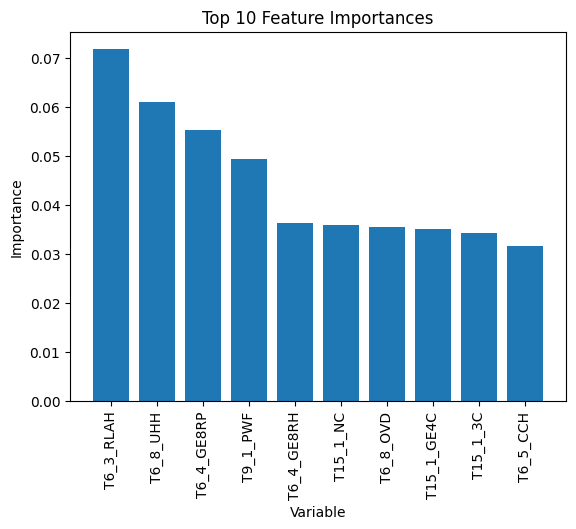

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of feature importances
plt.bar(range(len(top10_importances)), top10_importances['Importance'])
plt.xticks(range(len(top10_importances)), top10_importances['Variable'], rotation=90)
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
top_features = ['T6_3_RLAH', 'T6_8_UHH', 'T6_4_GE8RP', 'T9_1_PWF', 'T6_4_GE8RH', 'T15_1_NC',
 'T6_8_OVD', 'T15_1_GE4C', 'T15_1_3C', 'T6_5_CCH']

# Create a new DataFrame containing the top 10 features and the target variable
top_df = df2[top_features + ['Median Household Gross Income']]

In [ ]:
top_df.head()

,T6_3_RLAH,T6_8_UHH,T6_4_GE8RP,T9_1_PWF,T6_4_GE8RH,T15_1_NC,T6_8_OVD,T15_1_GE4C,T15_1_3C,T6_5_CCH,Median Household Gross Income
0,348.0,1.0,308.0,60.0,116.0,703.0,313,10,32,63,28511
1,73.0,7.0,38.0,25.0,12.0,143.0,117,2,9,30,28645
2,2.0,9.0,174.0,22.0,45.0,13.0,26,5,20,12,52789
3,67.0,9.0,149.0,22.0,43.0,60.0,46,15,29,64,35810
4,1.0,0.0,39.0,5.0,12.0,5.0,10,4,9,5,42365


# Classification

In [ ]:
top_df['Median Household Gross Income'].describe()

count      3409.000000
mean      44477.282194
std       11402.754619
min       14901.000000
25%       36495.000000
50%       43499.000000
75%       51242.000000
max      105943.000000
Name: Median Household Gross Income, dtype: float64

In [ ]:
mean_income = top_df['Median Household Gross Income'].mean()
top_df['above_mean'] = top_df['Median Household Gross Income'].apply(lambda x: 1 if x > mean_income else 0)

# Split the data into training and testing sets
X = top_df.drop(['Median Household Gross Income', 'above_mean'], axis=1) 
y = top_df['above_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-21-ecc76dc6c57e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['above_mean'] = top_df['Median Household Gross Income'].apply(lambda x: 1 if x > mean_income else 0)


In [ ]:
def classifier(clf, X_train_scaled, y_train, X_test_scaled, y_test, cv=5):

    # Fit the classifier to the training data
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv)
    print(f"Average cross-validation score: {cv_scores.mean():.2f}")
    
    return clf, accuracy, cv_scores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print('KNN')
knn = KNeighborsClassifier(n_neighbors=5)
clf, accuracy, cv_scores = classifier(knn, X_train_scaled, y_train, X_test_scaled, y_test)
print(' ')

from sklearn.svm import SVC

print('SVM')
svc = SVC(kernel='linear', C=1.0)
clf, accuracy, cv_scores = classifier(svc, X_train_scaled, y_train, X_test_scaled, y_test)
print(' ')

from sklearn.ensemble import RandomForestClassifier

print('RF')
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf, accuracy, cv_scores = classifier(rfc, X_train_scaled, y_train, X_test_scaled, y_test)
print(' ')

from sklearn.tree import DecisionTreeClassifier

print('DT')
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
clf, accuracy, cv_scores = classifier(dt, X_train_scaled, y_train, X_test_scaled, y_test)
print(' ')

from xgboost import XGBClassifier

print('XGB')
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)
clf, accuracy, cv_scores = classifier(xgb, X_train_scaled, y_train, X_test_scaled, y_test)


KNN
Accuracy: 0.83
Average cross-validation score: 0.82
 
SVM
Accuracy: 0.84
Average cross-validation score: 0.83
 
RF
Accuracy: 0.85
Average cross-validation score: 0.84
 
DT
Accuracy: 0.78
Average cross-validation score: 0.78
 
XGB
Accuracy: 0.84
Average cross-validation score: 0.83


# **CSO Data**

In [ ]:
df = pd.read_csv('ED-Combined.csv', encoding = 'unicode_escape')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ED                                                           3410 non-null   object 
 1   %Households where pension was majority of income             3409 non-null   object 
 2   %Households where social welfare was the majority of income  3409 non-null   object 
 3   Agriculture, Forestry and Fishing %                          3409 non-null   object 
 4   Construction %                                               3409 non-null   object 
 5   Financial, Real Estate, Administrative and Services %        3409 non-null   object 
 6   ICT, Scientific and Recreation %                             3409 non-null   object 
 7   Industry %                                                   3409 non-null   o

In [ ]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ED                                                           3410 non-null   object 
 1   %Households where pension was majority of income             3408 non-null   float64
 2   %Households where social welfare was the majority of income  3408 non-null   float64
 3   Agriculture, Forestry and Fishing %                          3288 non-null   float64
 4   Construction %                                               3405 non-null   float64
 5   Financial, Real Estate, Administrative and Services %        3408 non-null   float64
 6   ICT, Scientific and Recreation %                             3400 non-null   float64
 7   Industry %                                                   3403 non-null   f

In [ ]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ED                                                           3410 non-null   object 
 1   %Households where pension was majority of income             3410 non-null   float64
 2   %Households where social welfare was the majority of income  3410 non-null   float64
 3   Agriculture, Forestry and Fishing %                          3410 non-null   float64
 4   Construction %                                               3410 non-null   float64
 5   Financial, Real Estate, Administrative and Services %        3410 non-null   float64
 6   ICT, Scientific and Recreation %                             3410 non-null   float64
 7   Industry %                                                   3410 non-null   f

In [ ]:
df.head()

,ED,%Households where pension was majority of income,%Households where social welfare was the majority of income,"Agriculture, Forestry and Fishing %",Construction %,"Financial, Real Estate, Administrative and Services %","ICT, Scientific and Recreation %",Industry %,"Public Service, Education and Health %","Wholesale, Transport and Accomodation %",Median Household Gross Income
0,"001 Carlow Urban, Co. Carlow",15.8,29.4,1.1,5.0,14.0,11.0,12.6,30.9,25.3,28511.0
1,"002 Graigue Urban, Co. Carlow",20.4,26.3,2.0,8.3,16.2,8.1,12.7,25.7,26.9,28645.0
2,"003 Clonmore, Co. Carlow",17.0,12.1,10.6,8.9,13.3,12.2,13.9,27.3,13.7,52789.0
3,"004 Hacketstown, Co. Carlow",14.0,23.5,6.6,10.5,9.8,12.2,12.5,24.7,23.7,35810.0
4,"005 Haroldstown, Co. Carlow",18.8,14.6,12.1,10.2,11.0,13.5,14.6,23.2,15.4,42365.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


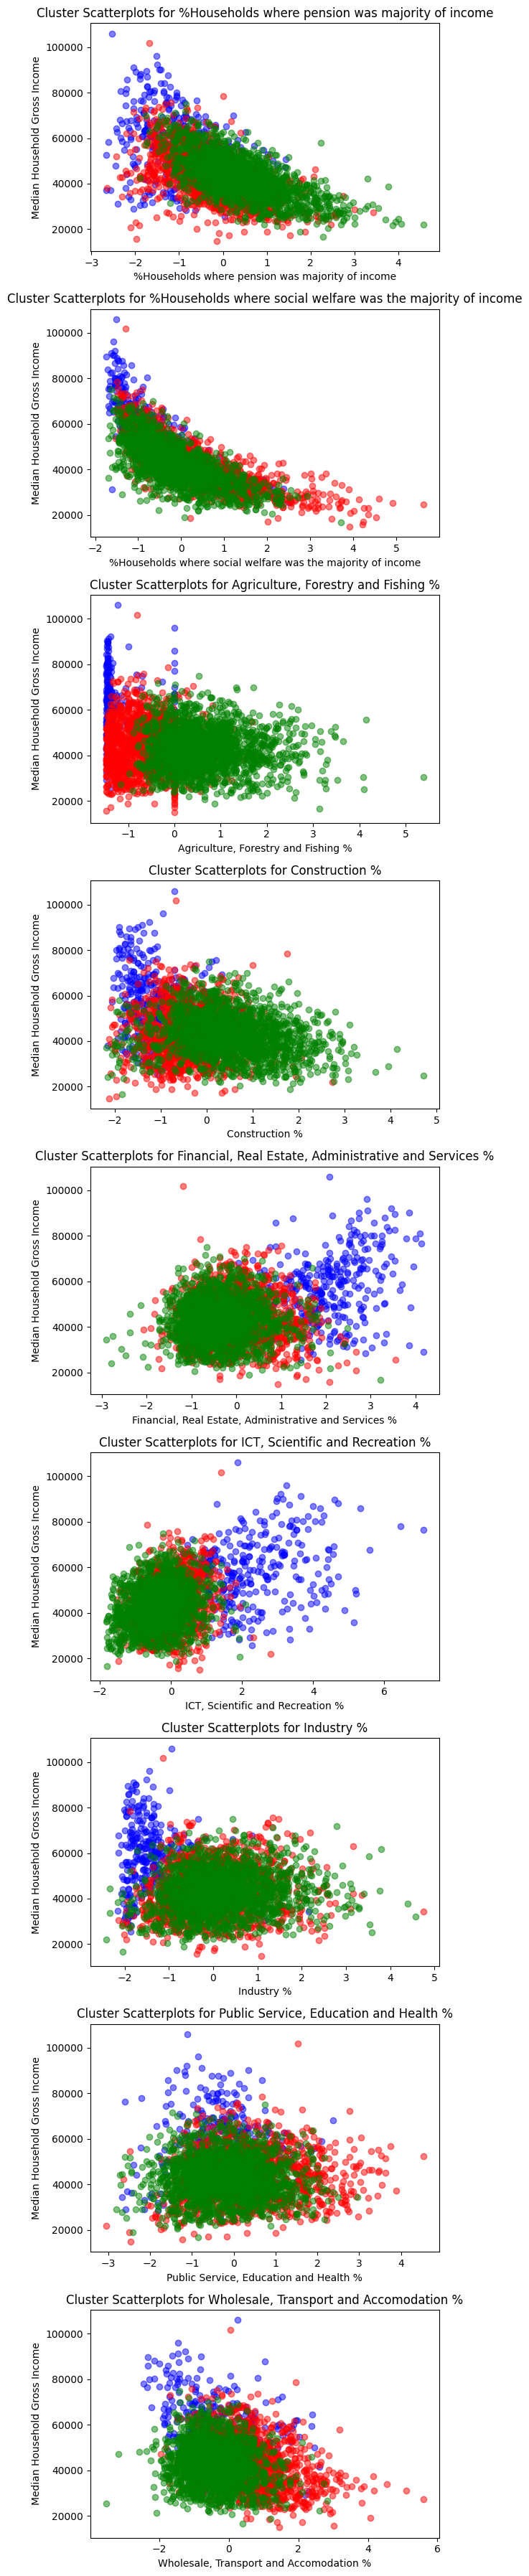

In [ ]:
# Create a list of feature names
feature_cols = ['%Households where pension was majority of income', '%Households where social welfare was the majority of income', 'Agriculture, Forestry and Fishing %', 'Construction %', 'Financial, Real Estate, Administrative and Services %', 'ICT, Scientific and Recreation %', 'Industry %', 'Public Service, Education and Health %', 'Wholesale, Transport and Accomodation %']

# Create scatterplots for each feature, colored by cluster label
fig, axs = plt.subplots(nrows=len(feature_cols), ncols=1, figsize=(6, 36))


# Standardize the numerical columns
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df[feature_cols])
cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

for i, feature in enumerate(feature_cols):
    ax = axs[i]
    for label, color in zip(range(n_clusters), ['blue', 'red', 'green']):
        cluster_data = df[df['Cluster'] == label]
        ax.scatter(cluster_data[feature], cluster_data['Median Household Gross Income'], c=color, alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Median Household Gross Income')
    ax.set_title(f'Cluster Scatterplots for {feature}')

plt.tight_layout()
plt.show()

In [ ]:
mean_income = df['Median Household Gross Income'].mean()
df['above_mean'] = df['Median Household Gross Income'].apply(lambda x: 1 if x > mean_income else 0)

# Split the data into training and testing sets
X = df.drop(['Median Household Gross Income', 'above_mean', 'ED', 'Cluster'], axis=1)
y = df['above_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def classifier(clf, X_train, y_train, X_test, y_test, cv=5):

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print(f"Average cross-validation score: {cv_scores.mean():.2f}")
    
    return clf, accuracy, cv_scores

In [ ]:
print('KNN')
knn = KNeighborsClassifier(n_neighbors=5)
clf, accuracy, cv_scores = classifier(knn, X_train, y_train, X_test, y_test)
print(' ')


print('SVM')
svc = SVC(kernel='linear', C=1.0)
clf, accuracy, cv_scores = classifier(svc, X_train, y_train, X_test, y_test)
print(' ')


print('RF')
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf, accuracy, cv_scores = classifier(rfc, X_train, y_train, X_test, y_test)
print(' ')


print('DT')
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
clf, accuracy, cv_scores = classifier(dt, X_train, y_train, X_test, y_test)
print(' ')


print('XGB')
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)
clf, accuracy, cv_scores = classifier(xgb, X_train, y_train, X_test, y_test)

KNN
Accuracy: 0.84
Average cross-validation score: 0.84
 
SVM
Accuracy: 0.87
Average cross-validation score: 0.86
 
RF
Accuracy: 0.88
Average cross-validation score: 0.86
 
DT
Accuracy: 0.84
Average cross-validation score: 0.82
 
XGB
Accuracy: 0.87
Average cross-validation score: 0.86
